In [184]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [231]:
df=pd.read_csv("VisaPremier.txt",delimiter='\t')

In [232]:
df.head()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,...,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,...,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,...,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,...,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,...,0,11,3,1,494773,21423,Coui,0,1,15


In [233]:
pd.Series(df['cartevpr']).value_counts()

0    714
1    359
Name: cartevpr, dtype: int64

In [234]:
df.describe()


,matricul,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,...,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
count,1.073000e+03,1073.00000,1073.000000,1073.000000,1073.0,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,...,1073.000000,1073.000000,1.073000e+03,1073.000000,1073.000000,1.073000e+03,1.073000e+03,1073.000000,1073.000000,1073.000000
mean,2.489307e+06,1.66356,42.532153,157.117428,0.0,-0.072693,1.505126,47.626281,57249.062442,5.456664,...,19.710158,0.000932,1.817335e+04,1.069897,0.136067,1.468193e+05,5.072736e+04,0.377446,0.334576,12.084809
std,1.925341e+06,1.08567,11.905142,156.065121,0.0,1.578875,2.797290,602.687390,116286.219326,12.329669,...,645.639327,0.030528,5.952984e+05,0.868047,0.379186,7.377687e+05,3.399783e+05,0.484974,0.472062,23.335589
min,1.133330e+05,1.00000,18.000000,1.000000,0.0,-51.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.604360e+05,1.00000,33.000000,45.000000,0.0,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.184000e+03,0.000000e+00,0.000000,0.000000,0.000000
50%,1.948586e+06,1.00000,43.000000,136.000000,0.0,0.000000,1.000000,12.000000,6017.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,0.000000,2.399300e+04,0.000000e+00,0.000000,0.000000,0.000000
75%,3.901594e+06,2.00000,52.000000,216.000000,0.0,0.000000,2.000000,27.000000,57818.000000,6.000000,...,0.000000,0.000000,0.000000e+00,2.000000,0.000000,1.148070e+05,5.000000e+02,1.000000,1.000000,10.000000
max,7.589439e+06,7.00000,65.000000,870.000000,0.0,0.000000,28.000000,19579.000000,970000.000000,99.000000,...,21149.000000,1.000000,1.950000e+07,5.000000,4.000000,1.985624e+07,7.066619e+06,1.000000,1.000000,134.000000


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
matricul    1073 non-null int64
departem    1073 non-null object
ptvente     1073 non-null int64
sexe        1073 non-null object
age         1073 non-null int64
sitfamil    1073 non-null object
anciente    1073 non-null int64
csp         1073 non-null object
codeqlt     1073 non-null object
nbimpaye    1073 non-null int64
mtrejet     1073 non-null int64
nbopguic    1073 non-null int64
moycred3    1073 non-null int64
aveparmo    1073 non-null int64
endette     1073 non-null int64
engagemt    1073 non-null int64
engagemc    1073 non-null int64
engagemm    1073 non-null int64
nbcptvue    1073 non-null int64
moysold3    1073 non-null int64
moycredi    1073 non-null int64
agemvt      1073 non-null object
nbop        1073 non-null int64
mtfactur    1073 non-null int64
engageml    1073 non-null int64
nbvie       1073 non-null int64
mtvie       1073 non-null int64
nbeparmo    1073 non-nu

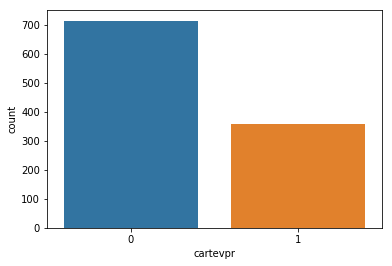

In [236]:
sns.countplot(x=df['cartevpr'],data=df)

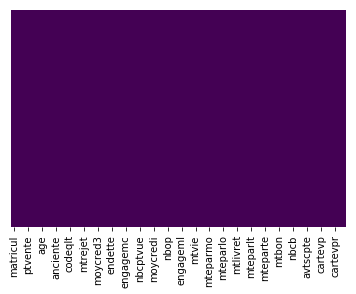

In [237]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

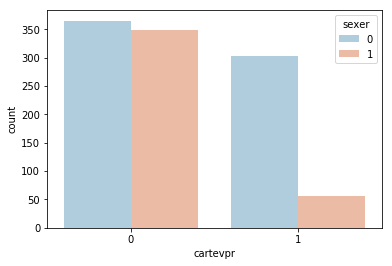

In [238]:
sns.countplot(x=df['cartevpr'],hue='sexer',data=df,palette='RdBu_r')

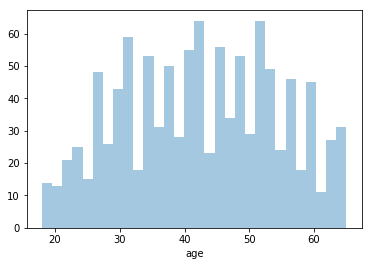

In [223]:
sns.distplot(df['age'],kde=False,bins=30)

In [239]:
df.drop(['sexe','csp','cartevp','sitfamil','codeqlt'],axis=1,inplace=True)

In [240]:
df.drop(['matricul'],axis=1,inplace=True)

In [241]:
df.drop(['nbpaiecb','agemvt'],axis=1,inplace=True)

In [242]:
df.drop(['departem'],axis=1,inplace=True)

In [243]:
df.drop(['age','sexer'],axis=1,inplace=True)

In [244]:
df.head()

,ptvente,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,...,nbeparte,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,cartevpr,nbjdebit
0,1,238,0,0,0,115,701939,4,119216,0,...,0,0,0,0,2,0,1303700,556967,1,1
1,6,270,0,0,4,19579,8920,0,0,0,...,0,0,1,19500000,2,0,19856243,133896,1,0
2,1,139,0,0,0,40,3402,0,0,0,...,0,0,0,0,1,0,122745,0,1,0
3,1,99,0,0,0,17,76321,0,0,0,...,0,0,0,0,2,0,83224,0,1,0
4,1,89,0,0,0,374,473350,0,209062,37859,...,0,0,0,0,3,1,494773,21423,1,15


In [245]:
x=df.drop(['cartevpr'],axis=1)
y=df['cartevpr']

In [246]:
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)

C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
def plot_confusion_matrix(cm, classes, title, cmap):
    "function for plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=45)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


def plot_roc_auc(arg1, arg2, arg3):
    "a function to plot roc_auc"
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, v in arg1: 
        y_score = v.predict_proba(arg2)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(arg3, y_score) 
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,lw=2, label= i + ' (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()  

In [248]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.30, random_state=101)

In [249]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [250]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  83.8%

Model Accuracy:  98.8%

Confusion Matrix:
 [[511   0]
 [  9 231]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       1.00      0.96      0.98       240

   micro avg       0.99      0.99      0.99       751
   macro avg       0.99      0.98      0.99       751
weighted avg       0.99      0.99      0.99       751




C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

===== LogisticRegression =====

Cross Validation Mean Score:  83.89999999999999%

Model Accuracy:  86.7%

Confusion Matrix:
 [[483  28]
 [ 72 168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       511
           1       0.86      0.70      0.77       240

   micro avg       0.87      0.87      0.87       751
   macro avg       0.86      0.82      0.84       751
weighted avg       0.87      0.87      0.86       751


===== Naive Baiye Classifier =====

Cross Validation Mean Score:  76.6%

Model Accuracy:  77.2%

Confusion Matrix:
 [[419  92]
 [ 79 161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       511
           1       0.64      0.67      0.65       240

   micro avg       0.77      0.77      0.77       751
   macro avg       0.74      0.75      0.74       751
weighted avg       0.78      0.77      0.77       751





========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  81.39999999999999%

Confusion Matrix:
 [[185  18]
 [ 42  77]]



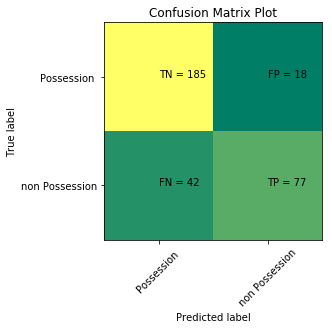


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       203
           1       0.81      0.65      0.72       119

   micro avg       0.81      0.81      0.81       322
   macro avg       0.81      0.78      0.79       322
weighted avg       0.81      0.81      0.81       322


=== LogisticRegression ===
Model Accuracy:  83.2%

Confusion Matrix:
 [[191  12]
 [ 42  77]]



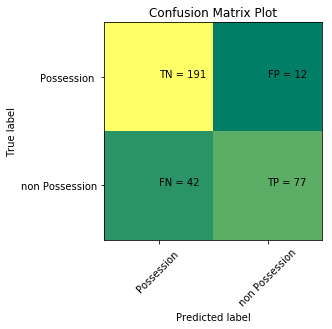


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       203
           1       0.87      0.65      0.74       119

   micro avg       0.83      0.83      0.83       322
   macro avg       0.84      0.79      0.81       322
weighted avg       0.84      0.83      0.83       322


=== Naive Baiye Classifier ===
Model Accuracy:  78.3%

Confusion Matrix:
 [[174  29]
 [ 41  78]]



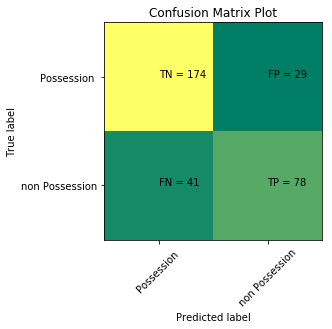


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       203
           1       0.73      0.66      0.69       119

   micro avg       0.78      0.78      0.78       322
   macro avg       0.77      0.76      0.76       322
weighted avg       0.78      0.78      0.78       322


============================= ROC Curve ===============================



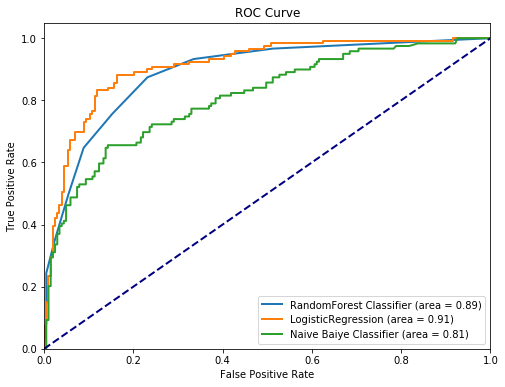

In [251]:
classdict = {'Possession ':0, 'non Possession':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)

In [252]:
from sklearn.neighbors import KNeighborsClassifier

In [253]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

In [265]:
# train knn model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)


#train lda model

lda=LDA(n_components=2)
lda.fit(X_train, y_train)

#desion tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)




C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [266]:
# Evaluate models
modlist = [('KNeighborsClassifier', RDF_Classifier),('LinearDiscriminantAnalysi', lda),
('DecisionTreeClassifier', dtree)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== KNeighborsClassifier =====

Cross Validation Mean Score:  83.8%

Model Accuracy:  98.8%

Confusion Matrix:
 [[511   0]
 [  9 231]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       1.00      0.96      0.98       240

   micro avg       0.99      0.99      0.99       751
   macro avg       0.99      0.98      0.99       751
weighted avg       0.99      0.99      0.99       751


===== LinearDiscriminantAnalysi =====

Cross Validation Mean Score:  82.0%

Model Accuracy:  85.0%

Confusion Matrix:
 [[493  18]
 [ 95 145]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       511
           1       0.89      0.60      0.72       240

   micro avg       0.85      0.85      0.85       751
   macro avg       0.86      0.78      0.81   

C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\dalia\Anacond

===== DecisionTreeClassifier =====

Cross Validation Mean Score:  78.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[511   0]
 [  0 240]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       240

   micro avg       1.00      1.00      1.00       751
   macro avg       1.00      1.00      1.00       751
weighted avg       1.00      1.00      1.00       751





========================== Model Test Results ========================

=== KNeighborsClassifier ===
Model Accuracy:  81.39999999999999%

Confusion Matrix:
 [[185  18]
 [ 42  77]]



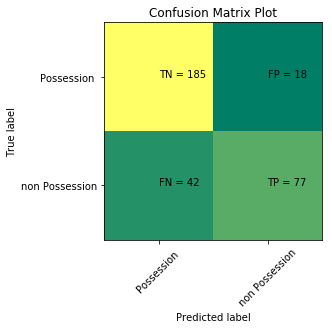


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       203
           1       0.81      0.65      0.72       119

   micro avg       0.81      0.81      0.81       322
   macro avg       0.81      0.78      0.79       322
weighted avg       0.81      0.81      0.81       322


=== LinearDiscriminantAnalysi ===
Model Accuracy:  78.3%

Confusion Matrix:
 [[192  11]
 [ 59  60]]



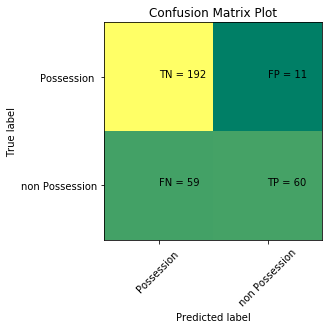


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       203
           1       0.85      0.50      0.63       119

   micro avg       0.78      0.78      0.78       322
   macro avg       0.81      0.73      0.74       322
weighted avg       0.79      0.78      0.77       322


=== DecisionTreeClassifier ===
Model Accuracy:  78.3%

Confusion Matrix:
 [[169  34]
 [ 36  83]]



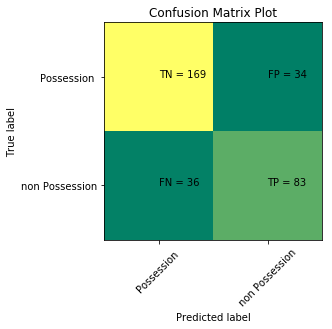


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       203
           1       0.71      0.70      0.70       119

   micro avg       0.78      0.78      0.78       322
   macro avg       0.77      0.76      0.77       322
weighted avg       0.78      0.78      0.78       322


============================= ROC Curve ===============================



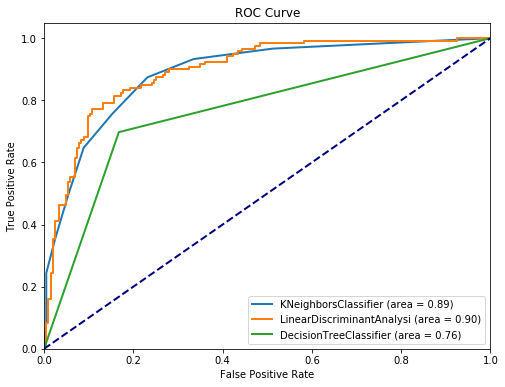

In [267]:
classdict = {'Possession ':0, 'non Possession':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)

In [257]:
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [258]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.30, random_state=101)

In [259]:
#svm model
model=SVC(gamma='auto',probability=True)
model.fit(X_train,y_train)

#svm non linear
Nmodel=SVC(kernel='poly', degree=8,gamma='auto',probability=True)
Nmodel.fit(X_train,y_train)
#qda
qdamodel= QuadraticDiscriminantAnalysis()
qdamodel.fit(X_train,y_train)

SVC

C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


sklearn.svm.classes.SVC

In [260]:
# Evaluate models
modlist = [('SVC',model),('SVC', Nmodel),
('QuadraticDiscriminantAnalysis', qdamodel)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== SVC =====

Cross Validation Mean Score:  82.19999999999999%

Model Accuracy:  88.5%

Confusion Matrix:
 [[492  19]
 [ 67 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       511
           1       0.90      0.72      0.80       240

   micro avg       0.89      0.89      0.89       751
   macro avg       0.89      0.84      0.86       751
weighted avg       0.89      0.89      0.88       751


===== SVC =====

Cross Validation Mean Score:  71.89999999999999%

Model Accuracy:  78.4%

Confusion Matrix:
 [[511   0]
 [162  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       511
           1       1.00      0.33      0.49       240

   micro avg       0.78      0.78      0.78       751
   macro avg       0.88      0.66      0.68       751
weigh

C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\dalia\Anaconda3\lib\site-


========================== Model Test Results ========================

=== SVC ===
Model Accuracy:  83.5%

Confusion Matrix:
 [[191  12]
 [ 41  78]]



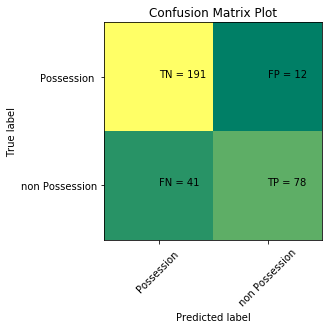


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       203
           1       0.87      0.66      0.75       119

   micro avg       0.84      0.84      0.84       322
   macro avg       0.84      0.80      0.81       322
weighted avg       0.84      0.84      0.83       322


=== SVC ===
Model Accuracy:  67.7%

Confusion Matrix:
 [[202   1]
 [103  16]]



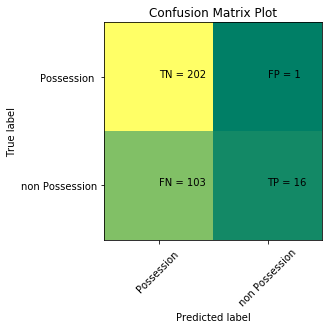


Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80       203
           1       0.94      0.13      0.24       119

   micro avg       0.68      0.68      0.68       322
   macro avg       0.80      0.56      0.52       322
weighted avg       0.77      0.68      0.59       322


=== QuadraticDiscriminantAnalysis ===
Model Accuracy:  75.5%

Confusion Matrix:
 [[165  38]
 [ 41  78]]



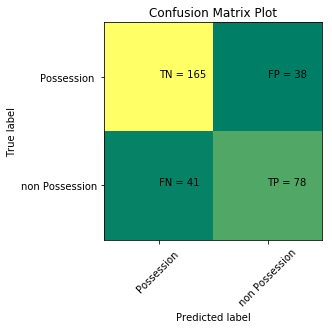


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       203
           1       0.67      0.66      0.66       119

   micro avg       0.75      0.75      0.75       322
   macro avg       0.74      0.73      0.74       322
weighted avg       0.75      0.75      0.75       322


============================= ROC Curve ===============================



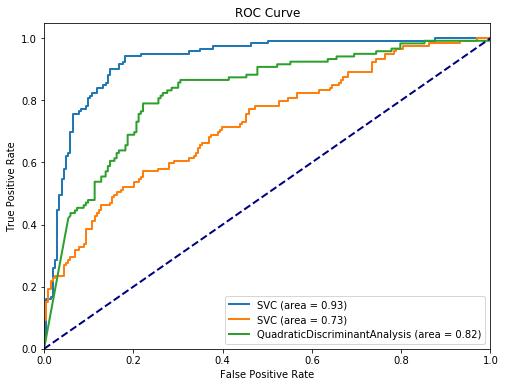

In [261]:
classdict = {'Possession ':0, 'non Possession':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)